In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)

In [1]:
import ast

In [7]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [11]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

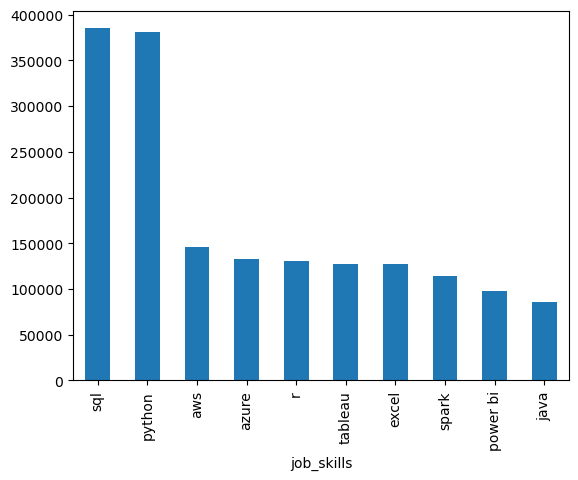

In [16]:
df_exploded['job_skills'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')

In [21]:
skill_count_by_job = df_exploded.groupby(['job_title_short','job_skills']).size()

In [24]:
type(skill_count_by_job)

pandas.core.frame.DataFrame

In [26]:
#Transfrom data series to Data frame with .reset_index(), 
# and name the col "skill_counts"
df_skill_count_by_job = skill_count_by_job.reset_index(name='skill_counts')

In [28]:
df_skill_count_by_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title_short  2256 non-null   object
 1   job_skills       2256 non-null   object
 2   skill_counts     2256 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 53.0+ KB


In [30]:
df_skill_count_by_job = df_skill_count_by_job.sort_values(by = 'skill_counts', ascending=False)
df_skill_count_by_job

,job_title_short,job_skills,skill_counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
1270,Machine Learning Engineer,nuix,1
1254,Machine Learning Engineer,mlr,1
1255,Machine Learning Engineer,monday.com,1
697,Data Engineer,chainer,1


In [52]:
#Create filters on job_title and top_skills

job_title = 'Data Scientist'
top_skills = 10

df_skill_final = df_skill_count_by_job[df_skill_count_by_job['job_title_short'] == job_title].head(top_skills)

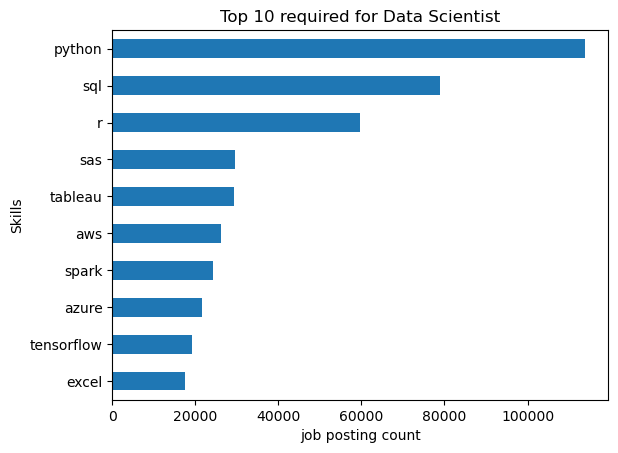

In [58]:
df_skill_final.sort_values(by = 'skill_counts', ascending= True).plot(kind = 'barh', x= 'job_skills', y='skill_counts')
plt.title(f'Top {top_skills} required for {job_title}')
plt.ylabel('Skills')
plt.xlabel('job posting count')
plt.legend().set_visible(False)
plt.show()